<a href="https://colab.research.google.com/github/Sauvannk/Qu-te/blob/main/Copie_de_040825_Adeline_Kang_Certification_Data_Analyst_Cas_Pratiques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Félicitations à tous les étudiants qui passent l'examen certifiant de Data Analyst avec la Wild Scode School !  
Vous avez parcouru un chemin remarquable dans votre apprentissage des compétences analytiques et votre maîtrise des techniques de traitement des données.  
Vous serez évalué sur des compétences à travers 4 cas pratiques:
- SQL, RGPD, Web Scraping et API
- Pandas
- Machine Learning
- Business Case

Vous pouvez effectuer les cas pratiques dans l'ordre que vous souhaitez. Pour vous aider dans votre organisation de travail, vous trouverez une estimation du temps pour chaque partie.  
En ce qui concerne les réponses écrites, pensez à bien soigner les explications, comme si vous répondiez à un client.

** Votre google collab qui contient toutes vos réponses à l'examen devra être déposé au plus tard (voir mail) dans le dépôt dont le lien vous a été communiqué par mail. **   

---

**Pour le cas pratique "Business Case", votre présentation se décompose sur deux supports:**
- **Slides de présentations contenant l'introduction (Présentation du contexte et problématique) et la conclusion (recommandations pour le client)**
- **Dashboard que vous utiliserez pour présenter vos graphiques et tables**  
---

**Rappel des livrables** :

**BLOC 1,2,3** :
1 fichier colab Notebook "Certification Data analyst - Cas Pratiques" avec les résultats attendus et commentés à l’écrit


**BLOC 4** :

1 Fichier Power Bi

1 Présentation (sous forme .pdf ou .ppt)


Veuillez mettre via le lien de dépôt reçu par mail, vos slides sous format .pdf, ainsi que des captures d'écrans de votre tableau de bord à l'intérieur de ce même .pdf. Il est indispensable que tous les éléments pour la présentation soient déposés dans ce dossier, dans le temps imparti.


De mercredi à vendredi, auront lieu les oraux pour chaque étudiant.
Chaque passage à l'oral se déroule de la façon suivante:

1. Questions du jury à l'étudiant, à partir du google collab qui contient les réponses aux cas pratiques SQL, RGPD, Web Scraping & API, Pandas et Machine Learning. Vous devrez partager votre écran et permettre au formateur de vous poser des questions sur le travail fourni sur votre fichier google collab.
2. Présentation du cas pratique "Business Case", d'une durée de 7 minutes, suivi d'une série de questions posées par le formateur.


Vous terminerez avec la présentation du cas pratique "Business Case", en répondant au besoin du client comme indiqué dans la partie Cas Pratique.


 Bonne chance à tous ! 🎉📊

---

# SQL, RGPD, Web Scraping & API  _(2 heures)_

## SQL

> 1. **Compétence C1.3** Le schéma de la base de données ci-dessous représente plusieurs tables.
Il existe des relations entre ces tables. **Etablissez les relations entre ses tables, en signifiant à chaque fois quelle est la clé primaire, la clé étrangère.**

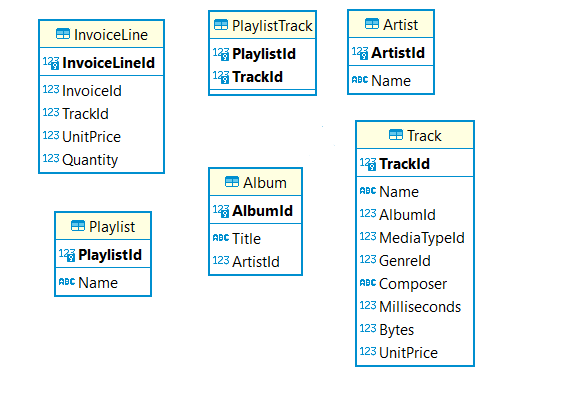

Exemple:

`Table1` --- `Table2`. Clé primaire: `Table2[nom_champ]` Clé étrangère: `Table1[nom_champ]`

**Réponse :**

> 2. **Compétence C1.3** Toujours en se basant sur le schéma de la base de données, existe-t-il une table intermédiaire ? Si oui, quel est le nom de cette table ? Dans quelle situation il est recommandé de créer une table intermédiare pour connecter deux tables ?



**Réponse:**

3. Requêtes SQL

Exécuter la cellule de code ci-dessous pour se connecter à la base de données.

In [64]:
import requests
import zipfile
import sqlite3
import pandas as pd

# Here we download the file from GitHub
r = requests.get("https://github.com/WildCodeSchool/wilddata/blob/main/music.zip?raw=true")
open('music.zip', 'wb').write(r.content)

# Then we unzip it
with zipfile.ZipFile("music.zip","r") as zip_ref:
    zip_ref.extractall()

# We connect to the database
conn = sqlite3.connect('music.sqlite')



In [65]:
# Voici un exemple de requête sql. La requête SQL est entre guillemets pour le premier argument, puis la variable conn en second argument.

pd.read_sql("select * from album", conn)

,AlbumId,Title,ArtistId
0,1,For Those About To Rock We Salute You,1
1,2,Balls to the Wall,2
2,3,Restless and Wild,2
3,4,Let There Be Rock,1
4,5,Big Ones,3
...,...,...,...
342,343,Respighi:Pines of Rome,226
343,344,Schubert: The Late String Quartets & String Qu...,272
344,345,Monteverdi: L'Orfeo,273
345,346,Mozart: Chamber Music,274


Effectuer des requêtes, pour répondre aux questions suivantes.

> 3.1 **Compétence C1.4** Renvoyer le nom de la playlist qui contient le plus de morceaux, ainsi que le nombre de morceaux pour cette playlist.

Résultat attendu:

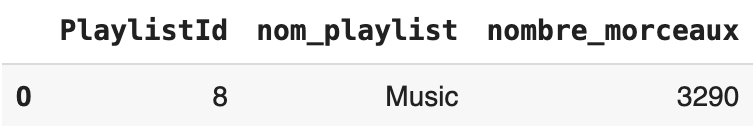

In [66]:
#je veux récupérer le nom de la playlist qui contient le plus de morceaux
#je fais une joiture des deux tables et trouver une clé commune
#ensuitre je compte le nomre de track.ID et je nomme la colonne
#je fais un group by et ensuite je trie par ordre décroissant.
# je veux afficher une seule ligne

pd.read_sql("""
SELECT
    p.playlistId,
    p.name AS nom_playlist,
    COUNT(pt.trackId) AS nombre_morceaux

From playlist AS P
JOIN playlistTrack AS pt
ON p.PlaylistId = pt.PlaylistId
GROUP BY p.playlistID, p.name
ORDER BY nombre_morceaux DESC
LIMIT 1

 """,conn)

,PlaylistId,nom_playlist,nombre_morceaux
0,1,Music,3290


> 3.2 Renvoyer les noms d'artistes, leur nombre de morceaux et leur nombre d'albums par artiste, dans l'ordre décroissant par rapport au nombre de morceaux.

Résultat attendu:

 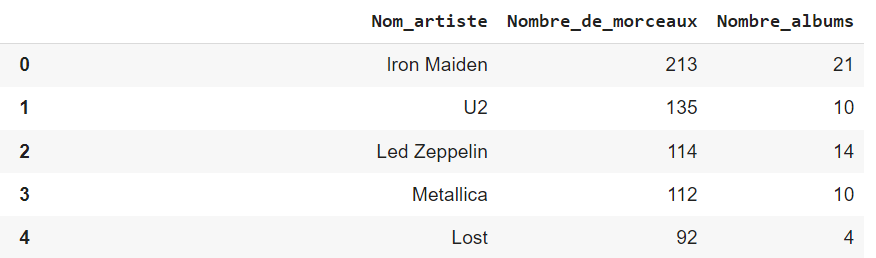

In [67]:
#Je veux récupéerer le nom des arties ainsi que le nombre de morceaux et le nombre d'albums. Je trie en DESC sur le nombre de morceaux
#Je veux afficuer que 5 lignes
pd.read_sql("""
SELECT
  at.name AS Nom_artiste,
  COUNT(tr.trackId) AS Nombre_morceaux,
  COUNT(DISTINCT tr.AlbumID) AS Nombre_albums

From Artist AS at
JOIN Album AS alb ON at.ArtistID = alb.ArtistId
JOIN Track AS tr ON alb.AlbumId = tr.AlbumId
GROUP BY at.name
ORDER BY Nombre_morceaux DESC
LIMIT 5

 """,conn)

,Nom_artiste,Nombre_morceaux,Nombre_albums
0,Iron Maiden,213,21
1,U2,135,10
2,Led Zeppelin,114,14
3,Metallica,112,10
4,Lost,92,4


> 3.3 **Compétence C1.1** Créer une requête qui renvoie le nombre de morceaux distinct dans la table `Track`. On souhaite renvoyer le nombre de morceaux qui ont des noms différents.

Résultat attendu:

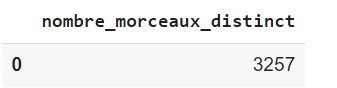

In [68]:
#dans ma requête, je veux afficher le nombre de morceaux
pd.read_sql("""select
count(DISTINCT Name)
AS nombre_morceaux_distinct
from Track""", conn)

,nombre_morceaux_distinct
0,3257


> 3.4. **Compétence C1.2** La maison de disque souhaiterai investir dans les genres qui sont les plus représentés, car ce sont les mieux vendu. Combien de morceaux contient le genre le plus représenté ?

Résultat attendu :

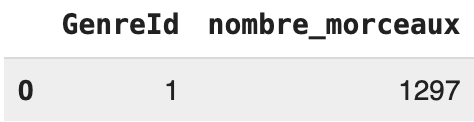

In [71]:
#dans ma requête, je veux grouper le genre le plus écouté
pd.read_sql("""
SELECT
    GenreId,
    COUNT(*) AS nombre_morceaux
FROM Track
GROUP BY GenreId
ORDER BY nombre_morceaux DESC
LIMIT 1
            """, conn)

,GenreId,nombre_morceaux
0,1,1297


---

## RGPD  



4: **Compétence C1.7** Que signifie RGPD, et quel est son objectif principal ?


**Réponse:**

L'Acronyme RGPD signifie Réglement Générale sur la Protection des Données au sein de l'U.E et de ses pays partenaires (Japon, Australie, Corée du Sud, USA...). L'objectif principale est de protéger les données personnelles des citoyens de l'Union Europénne en encadrant leur collècte, puis de leur traitement et ensuite de stocker et archiver les données. Le tout dans le respect de la réglementation.

> Ajouter une citation



---

## Web Scraping



5. **Compétence C1.5** Votre collègue de bureau à qui vous avez partagé le DataFrame `df_all` souhaite récuperer un descriptif de texte pour chaque arrondissement. C'est sa mission, pas la vôtre, donc vous allez vous contenter de répondre à sa question.
Votre collègue aimerait savoir si sa requête lui a permis d'avoir du contenu en retour.
Dans un cas, le code `response` lui renvoie "<Response [200]>", et dans l'autre cas, le code `response` lui renvoie "<Response [404]>".
Il ne comprend pas, et aimerait que vous lui expliquer ce que signifie chacune des deux réponses.
Soyez le plus clair possible, et écrivez votre réponse comme vous l'auriez expliqué à l'oral.

**Réponse:**

In [ ]:
# Response [200] signifie que la requête a bien fonctionné : le site marche, le contenu est disponible, et il peut être utilisé.

In [ ]:
# Response [404] affiche que la page demandée n’existe pas ou n’a pas été trouvée. Dans ce cas,  l’URL n'est pas bon, soit la ressource n’existe plus. Il n'est pas exploitable

---


## API

Voici les données de géolocalisation d'un appartement. L'objectif est de retrouver l'adresse de cet appartement à partir des coordonnées de géolocalisation ("latitude", "longitude"), grâce à une API.

In [ ]:
latitude_appartement = 48.895622
longitude_appartement = 2.337501

6. **Compétence C1.6** Utiliser la partie **reverse** de l'API [`https://adresse.data.gouv.fr/api-doc/adresse`](https://adresse.data.gouv.fr/api-doc/adresse) pour récupérer l' adresse de l'appartement, en utilisant les variables "latitude_appartement" et "longitude_appartement".


In [ ]:
 #API
import re #on importe la bibliothèque
import requests

lat = 48.895622
lon = 2.337501

url = f"https://api-adresse.data.gouv.fr/reverse/?lon={lon}&lat={lat}"
data = requests.get(url).json()

adresse = data['features'][0]['properties']

# je le mets sous forme de dictionnaire, c'est plus facile à lire
info = {
    'adresse complète': adresse['label'],
    'ville': adresse.get('city'),
    'code postal': adresse.get('postcode')
}

print(info)

{'adresse complète': '111 Rue Damrémont 75018 Paris', 'ville': 'Paris', 'code postal': '75018'}


---

# Pandas _(2 heures)_

Voici un Dataset `df_transactions` qui regroupe des transactions immobilières de la ville de Paris, entre 2018 et 2019.
L'objectif de ce cas pratique est de répondre à plusieurs questions.

In [ ]:
import pandas as pd

df_transactions = pd.read_csv("https://raw.githubusercontent.com/WildCodeSchool/wilddata/main/transactions_paris.csv")

df_transactions

,id_mutation,valeur_fonciere,surface_reelle_bati,prix_m2,nombre_pieces_principales,type_local,nom_commune,nom_iris,code_commune,code_departement,code_iris,id_parcelles,longitude,latitude,date_mutation
0,2019-1064422,156000.0,19,8210,1,appartement,Paris 3e Arrondissement,Enfants Rouges 3,75103,75,751031003,75103000AK0097,2.361791,48.861877,2019-07-03
1,2019-1080094,495000.0,53,9339,3,appartement,Paris 15e Arrondissement,Saint-Lambert 10,75115,75,751155710,75115000BJ0016,2.283552,48.836610,2019-04-30
2,2019-1078635,430000.0,49,8775,3,appartement,Paris 15e Arrondissement,Saint-Lambert 24,75115,75,751155724,75115000BT0039,2.298475,48.841206,2019-01-17
3,2019-1069949,216000.0,30,7200,3,appartement,Paris 10e Arrondissement,Hopital Saint-Louis 3,75110,75,751104003,75110000BJ0070,2.371124,48.872010,2019-04-17
4,2019-1093709,500000.0,45,11111,2,appartement,Paris 18e Arrondissement,Grandes Carrieres 12,75118,75,751186912,75118000AV0086,2.338148,48.890540,2019-07-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,2019-1090117,206450.0,21,9830,1,appartement,Paris 17e Arrondissement,Epinettes 7,75117,75,751176807,75117000DH0132,2.321425,48.892270,2019-10-07
286,2018-1400990,113000.0,11,10272,1,appartement,Paris 18e Arrondissement,Clignancourt 24,75118,75,751187024,75118000BE0079,2.343846,48.895130,2018-05-23
287,2018-1391042,315000.0,30,10500,2,appartement,Paris 15e Arrondissement,Saint-Lambert 10,75115,75,751155710,75115000BK0018,2.288922,48.838097,2018-12-27
288,2018-1402082,366000.0,58,6310,4,appartement,Paris 18e Arrondissement,Chapelle 5,75118,75,751187205,75118000CZ0021,2.361734,48.893486,2018-07-26


> 7. **Compétence C2.6** Supprimer les valeurs aberrantes, qui ont une surface supérieure à 6000 et les insérer dans un DataFrame, nommé `df_outliers`. Renvoyer le nombre de lignes pour ce DataFrame.

In [ ]:
#je veux afficher les valeurs abberantes
df_outliers = df_transactions[df_transactions['surface_reelle_bati']>6000]
#je veux afficher le nombre de lignes abberantes
len(df_outliers)
#Il y en a 4

4

In [ ]:
#autre méthode pour supprimer
df.dropna(inplace=True)

> 8. **Compétence C2.6 (deuxième chance)** Vérifier le nombre de valeurs manquantes pour chaque colonne.

In [ ]:
df_transactions.isna().sum()
#Pas de valeurs manquantes après vérification

,0
id_mutation,0
valeur_fonciere,0
surface_reelle_bati,0
prix_m2,0
nombre_pieces_principales,0
type_local,0
nom_commune,0
nom_iris,0
code_commune,0
code_departement,0


> 9. **Compétence C2.5** Observer le nombre de valeurs distinctes pour la colonne "type_local" pour `df_transactions`.

In [ ]:
df_transactions['type_local'].nunique()

2

In [ ]:
df_outliers['type_local'].nunique()
#Le résultat est de 1

1

> 10. **Compétence C2.5** Quelle est la moyenne de la "surface_reelle_bati" pour chaque valeur de la variable "type_local"?

In [ ]:
df_transactions.groupby("type_local")["surface_reelle_bati"].mean()

,surface_reelle_bati
type_local,
appartement,47.356643
local industriel,8672.500000


In [ ]:
df_outliers.groupby('type_local')["surface_reelle_bati"].mean()

,surface_reelle_bati
type_local,
local industriel,8672.5


---

## Regex

> 11. **Compétence C2.7, Compétence C2.3** Utiliser la librairie `re` (Regular Expression) pour extraire le code postal de l'adresse ci-dessous, à l'aide d'une fonction que vous allez créer:

In [ ]:
adresse = "8 Passage Petit Cerf 75017 Paris"


In [ ]:
#j'importe la bibliothèque
import re
#ensuite j"applique une def
def extraction(adresse):
  cp = re.search(r"\b75\d{3}\b", adresse)
  if cp:
    return cp.group()
  return none

adresse = "8 Passage Petit Cerf 75017 Paris"
#j'utilise la fonction et je vais afficher le résultat
print("Voici le code postal :", extraction(adresse))



Voici le code postal : 75017


## Méthode Agile SCRUM



> 12. **Compétence C2.2** Dans le cadre de l'utilisation de la méthode agile SCRUM, quelle est la différence entre le scrum master et le product owner ?

**Réponse :**

In [ ]:
#La méthode agile repose sur 4 valeurs :

#Les Individus et les interactions sont plus importants que les processus et les outils
#Un logiciel fonctionnel est plus important qu'une documentation complète
#La Collaboration avec le client est plus importante que la négociation du contrat
#Répondre au changement est plus important que de suivre un plan


#Le scrum aide à la bonne cohésion d'équipe au travail dans une optique d'amélioration en continue. Il facilite le travail de l’équipe, supprime les obstacles et encourage une amélioration continue en travaillant par itérations courtes (sprints).
#Tandis que le product owner, est le  porte-parole de la vision des utilisateurs et de la direction. Il possède la vision du produit, il sait pourquoi le produit doit exister, quel problème le produit va résoudre et à qui le produit est destiné.

---

## Sélection de données

Voici un nouveau Dataset `df_transactions` qui regroupe des transactions immobilières de la ville de Paris, entre 2018 et 2019.



In [ ]:
import pandas as pd

df_transactions = pd.read_csv("https://raw.githubusercontent.com/WildCodeSchool/wilddata/main/transactions_immobilieres_75.csv")

df_transactions.head(1)

,id_mutation,valeur_fonciere,surface_reelle_bati,prix_m2,nombre_pieces_principales,type_local,nom_commune,nom_iris,code_commune,code_departement,code_iris,id_parcelles,longitude,latitude,date_mutation
0,2018-1404085,280000.0,25,11200,2,appartement,Paris 20e Arrondissement,Belleville 4,75120,75,751207704,75120000AL0064,2.389542,48.8723,2018-01-02


> 13.**Compétence C2.1** Créer un nouveau DataFrame `df_flats` qui ne regroupe que les appartements. Combien de lignes contient `df_flats` ?

In [ ]:
#je veux afficher que les colonnes "type_local" qui a pour valeur "appartement"
df_flats = df_transactions[df_transactions['type_local']=='appartement']
df_flats.shape
print(f"Dans le DataFrame df_flats, il y a {df_flats.shape[0]} lignes.")

Dans le DataFrame df_flats, il y a 48921 lignes.


In [ ]:
df_flats.shape

(48921, 15)

# Machine Learning _(4 heures)_

## Sélection de données et NLP *(30 minutes)*

Dans ce cas pratique Machine Learning,  notre objectif sera de créer un algorithme capable de prédire le prix d'appartements, pour la ville de Paris. Vous utiliserez donc le DataFrame `df_flats`.

> 13. Ne garder que les colonnes [`valeur_fonciere`, `surface_reelle_bati`, `nombre_pieces_principales`, `code_commune`] pour le DataFrame `df_flats`.

In [ ]:
#je veux ga rder les colonnes suivantes
df_flats = df_flats[['valeur_fonciere', 'surface_reelle_bati', 'nombre_pieces_principales','code_commune']]

In [ ]:
#je vais afficher et c'est ok
df_flats.head()

,valeur_fonciere,surface_reelle_bati,nombre_pieces_principales,code_commune
0,280000.0,25,2,75120
1,110000.0,12,1,75114
2,87950.0,9,1,75111
3,699000.0,111,6,75113
4,251000.0,29,2,75112


> **Compétence C3.5** 14. On aimerait enrichir notre jeu de données avec une variable qui contient du texte pour chaque ligne. Citez un nom de variable explicite, qui permettrait d'enrichir notre jeu de données. En quoi cette variable de texte constituerait une valeur ajoutée pour le jeu de données `df_flats`.  Si vous pourriez créer cette colonne, comment est-ce que vous procéderiez techniquement pour l'exploiter ? Est-ce que cette variable de texte pourrait avoir un impact conséquent sur les performances d'un modèle de prédiction ? Si oui, pourquoi ?



In [ ]:
#Il est souhaitable d'ajoujer une colonne que je nomme "descriptif_du_bien". Il y aura donc  un texte descriptif détaillé de l'appartement correspoddant pour donner plus de valeur.
#exemple = Appartement proche du métro au dernier étage, spacieux et lumineux".
#La colonne est utile car elle apporte une valeur ajoutée supplémentaire et une information qualitative complémentaire
# (au pied du métro, secteur recherché, calme,....) qui peut influencer le prix.

#On appliquera donc le traitement de texte NLP pour nettoyer les mots, enlever la ponctuation, supprimer les stops words. Ensuite, le texte sera numérisé pour inétégrer dans un modèle de prédilécrion.
#Ainsi, cela va apporter une performancce du modèle car on ajoute des informations supplémentaires  et qui va influencer sur l'estimation du prix de l'appartement.

**Réponse**

In [ ]:
#J'importe toutes les bibliothèques pour être sure de ne rien oubier
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
import seaborn as sns

### Partie Machine Learning - Regression _(1 heure 45 minutes)_

> 14. Créer `X` et `y` en vue d'entraîner un modèle capable de prédire le prix d'appartements.
`X` est composé des variables `surface_reelle_bati`, `nombre_pieces_principales` et `code_commune`.
`y` est la variable `valeur_fonciere`.


In [ ]:
X = df_flats.drop('valeur_fonciere', axis=1)
y = df_flats['valeur_fonciere']

> 15. La colonne `code_commune` contient des codes, représentant les arrondissements, ce qui signifie que ce sont des valeurs discrètes. Il est donc nécessaire de créer autant de colonnes qu'il y a de valeurs distinctes pour cette colonne. Aussi, il faudra supprimer la colonne `code_commune` pour ne garder que les colonnes qui ont été générées à partir de cette dernière.

In [ ]:
#Du coup, je fais un drop de la colonne qui contient les arrondissements à Paris
X = pd.get_dummies(X, columns=['code_commune'])

In [ ]:
#une vérification si ça à bien marcher
X.columns.tolist()

['surface_reelle_bati',
 'nombre_pieces_principales',
 'code_commune_75101',
 'code_commune_75102',
 'code_commune_75103',
 'code_commune_75104',
 'code_commune_75105',
 'code_commune_75106',
 'code_commune_75107',
 'code_commune_75108',
 'code_commune_75109',
 'code_commune_75110',
 'code_commune_75111',
 'code_commune_75112',
 'code_commune_75113',
 'code_commune_75114',
 'code_commune_75115',
 'code_commune_75116',
 'code_commune_75117',
 'code_commune_75118',
 'code_commune_75119',
 'code_commune_75120']

> 16. **Compétence C3.2** Séparer les données en jeu d'entraînement et jeu de test, avec `random_state = 0`

In [ ]:
#j'ai pris un test size à 0.2, c'est pour déterminer la proportion du jeu de données
#parce que 0.2 → 20 % pour tester, 80 % pour entraîner
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

> 17. Importer le modèle `Linear Regression` de la librairie `sklearn`

In [ ]:
from sklearn.linear_model import LinearRegression

> 18. **Compétence C3.3** Entraîner le modèle sur le jeu d'entraînement, puis évaluer les performances du modèle sur le jeu de test. A l'écrit, interpréter le score obtenu, et donner le nom de la métrique utilisé pour évaluer le score du modèle.

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

**Réponse:**

In [ ]:
#J'utilise 2 métriques  pour évaluer le modèle de régression.
#La 1ère est r2(score de détermination)
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
print(f"Score R² : {r2:.2f}")

Score R² : 0.85


In [ ]:
#La 2ème est le RMSE
from sklearn.metrics import mean_squared_error
import numpy as np
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE : {rmse:.2f}")

RMSE : 163125.98


> 19. **Compétence C3.7** Expliquer et vulgariser le fonctionnement interne de l'algorithme, pour qu'il puisse faire ses prédictions.
Expliquer aussi quelles sont la, ou le(s) variable(s) utilisé par l'algorithme pour faire ses prédictions de prix.

**Réponse :**

In [ ]:
J’ai évalué le modèle de régression linéaire à l’aide de deux métriques :

Le score R² est de 0.85, ce qui signifie que le modèle explique 85 % de la variance du prix.

Le RMSE est de 163 125 €, ce qui représente l’erreur quadratique moyenne entre les prix réels et prédits.

Ces résultats indiquent que le modèle est globalement performant pour prédire le prix d’un appartement.

In [ ]:
#Le modèle utilisé est la régression linéaaire avec l'aide deux métriques.
#Le score r² est de 0.85 : cela indique que le modèle expliQUE 85 % de la variance du prix.

#Pour le RMSE, il est de 163 125.98 €. Le modèle se trompe en moyenne 163 125.98 € lorsqu'il prédit le prix estimé de l'appartement

> 20. **Compétence C3.1** Afficher la matrice de corrélation pour `df_flats`. Quelles sont les deux variables qui ont la corrélation la plus élevée avec `y`, c'est à dire "valeur foncière" ?

**Réponse :**


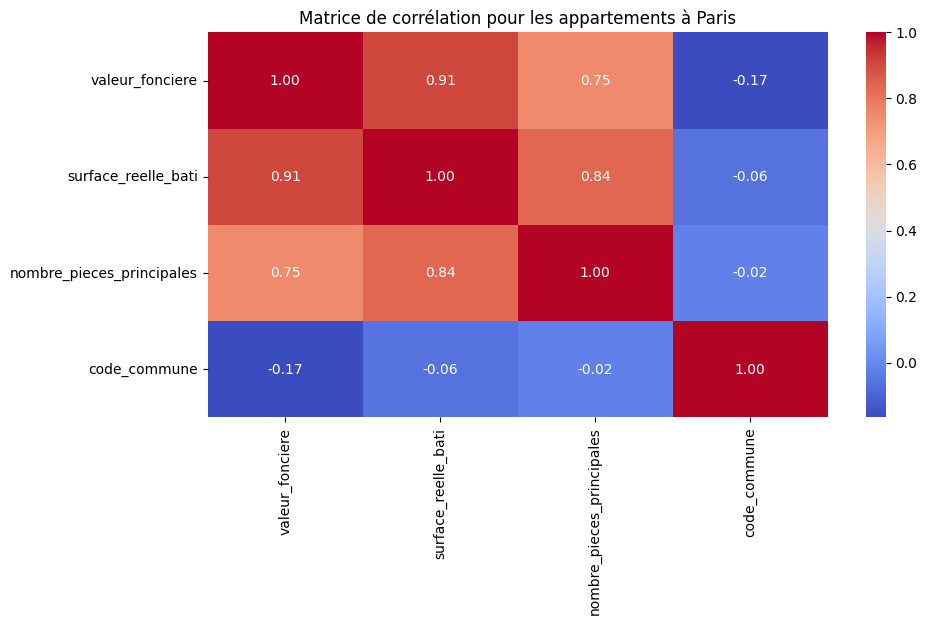

In [ ]:
#j'importe les bibliothèques pour faire une heatmap
import seaborn as sns
import matplotlib.pyplot as plt

corr = df_flats.corr(numeric_only=True)

#j'afficche les résultats
plt.figure(figsize=(10,5))
plt.xlabel('Prédictions')
plt.ylabel('Valeurs réelles')
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matrice de corrélation pour les appartements à Paris")
plt.show()

In [ ]:
#Pour répondre à la question, la coorélation la plus élevée avec y = valeur_foncière sont :
#- surface_réelle avec 0.91
#- nombre_pièces_principales avec 0.75

#La surface et le nombre de pièces principales sont les deux variables les plus corrélés pour estimer le prix d'un appartement (valeur_foncière)


### Partie Machine Learning - Classification _(1 heure 45 minutes)_



In [ ]:
df_ml_idf = pd.read_csv("https://raw.githubusercontent.com/WildCodeSchool/wilddata/main/transactions_idf_no_paris.csv")
df_ml_idf.head(1)

,valeur_fonciere,surface_reelle_bati,nombre_pieces_principales,type_local
0,282000.0,101,4,maison


> 21. Créer `X` et `y` en vue d'entraîner un modèle capable de prédire si un logement est une maison ou un appartement.
`X` est composé des `valeur_fonciere`, `surface_reelle_bati` et`nombre_pieces_principales`.
`y` est la variable `type_local`.

In [ ]:
X = df_ml_idf[['valeur_fonciere', 'surface_reelle_bati','nombre_pieces_principales']]
y = df_ml_idf['type_local']

> 22. Séparer les données en jeu d'entraînement et jeu de test, avec random_state = 0

In [ ]:
from sklearn.model_selection import train_test_split
#j'ai pris un test size à 0.2, c'est pour déterminer la proportion du jeu de données
#parce que 0.2 → 20 % pour tester, 80 % pour entraîner

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

> 23. Importer le modèle `DecisionTreeClassifier` ou `KNeighborsClassifier` de la librairie sklearn.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
#je prends celle-ci car elle est plus simple



> 24. **Compétence C3.4** Entraîner le modèle sur le jeu d'entraînement, puis évaluer les performances du modèle sur le jeu de test. A l'écrit, interpréter le score obtenu, et donner le nom de la métrique utilisé pour évaluer le score du modèle.

In [ ]:
#on va créer le modèle
model = DecisionTreeClassifier()

#on entraîne le modèle

model.fit(X_train, y_train)

#pour le prédire par la suite
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
#cela évalue la performance du modèle de classification et cela mesure la proportion de prédictions correctes faites par le modèle
accuracy = accuracy_score(y_test, y_pred)
print(f"Précision du modèle : {accuracy:.2f}")

Précision du modèle : 0.78


In [ ]:
Le modèle utilisé est un arbre de décision (DecisionTreeClassifier).
La métrique utilisée pour évaluer les performances est la précision (`accuracy`).
Elle correspond à la proportion de prédictions correctes.
La précision obtenue est de **0.78**, ce qui signifie que le modèle prédit correctement **78 %** des cas.


**Réponse :**

In [ ]:
#Pour répondre à la question, le modèle utilisé est le DecisionTreeClassifier.
#La métrique utilisé pour évaluer les performances, c'est le accuracy.
#Cela correspond à la proportion de prédictions correctes. En effet,
#la précision retenue est de 0.78 => le modèle prédit correctement à 78 %

> 25. **Compétence C3.6** On exploite ici des données pour le jeu d'entraînement, et des données pour le jeu de test. Quelles sont les limites de cette méthode ?

In [ ]:
#Les limites de cette méthode est que le modèle est entrainé, testé sur des données séparés. Pourtant ces données proviennent de la même source. Elle n'est pourtant pas représentative à 100%.
#Dans le dataset, les appartements sont à Paris et certains arrondissement ne se valent pas. Le modèle n'est pas représentatif du cas réel.Le prix d'appartement dans le 7ème arronissement n'est pas le même que celui de arrondissement proche banlieue. D'autant plus,
# cela fausse le résultat s'il y a prédilections pour des logements en région parisienne (ex= Neuilly sur Scène dans le 92 vs Bobigy dans le 93)



**Réponse :**

> 26. Afficher la matrice de confusion (`confusion matrix`) et la commenter. Expliquer les métriques `precision` et `recall`.

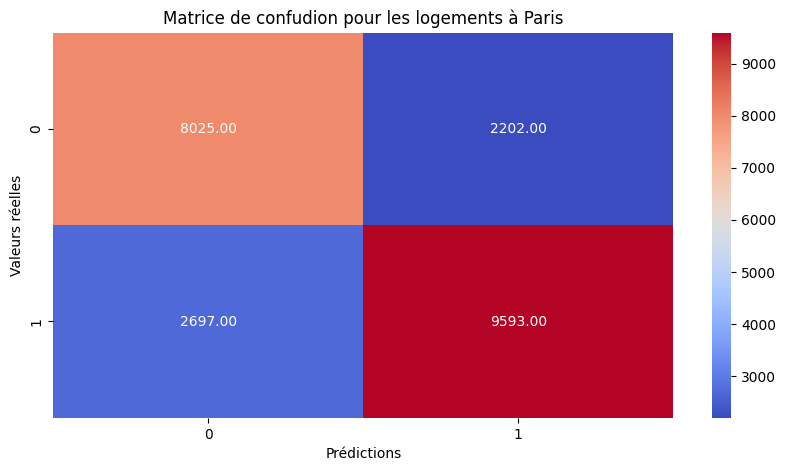

In [ ]:
#j'importe les bibliothèques pour faire une heatmap
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)


#j'afficche les résultats
plt.figure(figsize=(10,5))
sns.heatmap(cm, annot=True, cmap="coolwarm", fmt=".2f")
plt.xlabel('Prédictions')
plt.ylabel('Valeurs réelles')
plt.title("Matrice de confudion pour les logements à Paris")
plt.show()

**Réponse :**


In [ ]:
#D'après les résultats :

# 8025 vrais négatifs => 0 bien prédit

# 9593 vrais positifs => 1 bien prédit

# 2202 faux positifs =>  0  prédit 1

# 2697 faux négatifs => 1 prédit 0

# 0 bien prédit


#Le modèle peut se tromper en classant un logement mal située comme un appartement (ou inversement) si la localisation n’est pas prise en compte dans les variables, alors que c’est un critère important dans la réalité.
#Idem, un logement très petit  mais bien situé pourrait être mal classé.

# Étude de marché - Vin _(8 heures)_

Le client, le Domaine des Croix, cherche à se lancer sur le marché américain . Il souhaite donc **définir le prix** de ses bouteilles de vin **pour être compétitif sur le marché américain**. Il a récupéré un jeu de données de 130k bouteilles de vin, avec les cépages, les pays et région de production, les millésimes (c'est-à-dire les années de production), ainsi que des notes ("points") et descriptifs d'oenologues (les spécialistes du vin), et le prix moyen en dollars de toutes ces bouteilles sur le marché américain.

**L'objectif sera de faire une présentation de l'analyse du marché, et du prix que vous conseillez de fixer pour les vins du client.** Le client n'est pas data analyst, mais souhaiterait comprendre la démarche. Il faudra donc s'attacher à expliquer comment les prix ont été fixés, sans rentrer dans un trop grand niveau technique, autrement dit : vulgariser.




## Jeux de données
- Dataset des 130k vins : https://github.com/WildCodeSchool/wilddata/raw/main/wine.zip
- Dataset de la bouteille de vin que le client aimerait proposer sur le marché américain : https://raw.githubusercontent.com/WildCodeSchool/wilddata/main/domaine_des_croix.csv


## Livrables attendus
**Compétence C4.6, Compétence C4.1** Le client souhaite une présentation (et non pas du code)
La présentation contiendra a minima ces éléments :
- Rappel du contexte et de la problématique
- Analyse exploratoire des données
- Méthodologie, outils et langages utilisés  **Compétence C2.2**
- Présentation de la partie technique et du code créé, si code il y a, pour cette analyse
- Votre tableau de bord contient des graphiques. **Compétence C4.2**
- Votre tableau de bord contient au moins une visualisation de données interactive. **Compétence C4.3**
- Votre tableau de bord contient au moins une carte représentant des informations géographiques. **Compétence C4.4**
- Votre tableau de bord contient au moins un tableau croisé. **Compétence C4.5**
- L'ensemble des graphiques et visuels doivent être lisible par tous (prise en compte des personne en situation de handicap visuel). **Compétence C4.7**
- Réponse à la question métier : proposition de prix ou de fourchette de prix au client pour être correctement positionné face à la concurrence sur le marché américain

Effectuez tout d'abord la trame ci-dessous. Puis, si vous avez des bonnes idées à proposer au client, elles sont évidemment les bienvenues.



## Préparation des données et exploration des données

## Analyse du marché
Le Domaine des Croix souhaiterait une analyse descriptive du marché du vin. Vous allez donc réaliser un ensemble de dataviz, avec l'outil de votre choix (Seaborn, Plotly, Excel, PowerBI, Tableau, etc...). Vous pouvez par exemple intégrer dans votre tableau de bord:
- la répartition du nombre de vins par pays
- les pays qui ont les meilleures notes
- les moyennes de notes par cépage
- la répartition par décile
- etc...



## Analyse comparative

L'objectif ici sera de comparer chacun des vins du client par rapport à ses concurrents sur le marché. Par exemple, comparer les tarifs pratiqués pour les vins français, puis de plus en plus précisément, les vins de Bourgogne puisque notre client est en Bourgogne, puis les Pinot Noir bourguignons de la même année.
N'hésitez pas à être original dans la présentation et les dataviz utilisées.

## Proposition de valeur

Avec le tableau de bord que vous lui avez fourni, le client a une idée précise de ses concurrents. Faites lui une proposition de prix en fonction de sa volonté de positionnement (par exemple : "si vous souhaitez vous positionner sur le haut de gamme, les 25% les plus chers de vos concurrents sont à ce tarif, nous vous conseillons donc de vous aligner sur ce prix").

## Qualité esthétique du tableau de bord

Essayez de garder un oeil critique et visuel sur votre tableau de bord. La forme compte autant que le fond pour le client qui n'est pas data analyst. Pensez donc à "vendre" votre analyse. Par exemple, avec des couleurs s'inspirant du milieu vinicole, des dataviz originales, etc...

## C'est à vous de jouer:

In [5]:
import pandas as pd


In [6]:
link = "https://github.com/WildCodeSchool/wilddata/raw/main/wine.zip"
df = pd.read_csv(link)

df.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2019 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,20.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2017 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,18.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2019 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,18.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2019 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2016, this...",Vintner's Reserve Wild Child Block,87,44.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2018 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


Nettoyage & Analyse des donénes

In [7]:
df.shape
#Il y a 13 colonnes pour 129957 lignes

(129957, 13)

In [8]:
#je veux compter le nombre de variété dans le dataframe
df['variety'].value_counts()

,count
variety,
Pinot Noir,13259
Chardonnay,11752
Cabernet Sauvignon,9472
Red Blend,8946
Bordeaux-style Red Blend,6915
...,...
Picapoll,1
Blauburger,1
Tinta Madeira,1


In [15]:
#je veux garder que ces variétés dans mon tableau

count
variety
Pinot Noir	13259
Chardonnay	11752
Cabernet Sauvignon	9472
Red Blend	8946
Bordeaux-style Red Blend	6915

SyntaxError: invalid syntax (ipython-input-2332450095.py, line 5)

In [10]:
#je veux extraire l'année depuis la colonne titre
df["annee"] = df["title"].str.extract(r"(\d{4})")

# mettre la colonne 'annee' en entier
df["annee"] = df["annee"].astype(int)


ValueError: cannot convert float NaN to integer

In [11]:
df["annee"] = pd.to_numeric(df["annee"], errors='coerce')  # convertit les non-valides en NaN
df = df.dropna(subset=["annee"])  # supprime les lignes où 'annee' est NaN
df["annee"] = df["annee"].astype(int)

/tmp/ipython-input-118186760.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["annee"] = df["annee"].astype(int)


In [12]:
df['annee']

,annee
0,2019
1,2017
2,2019
3,2019
4,2018
...,...
129952,2019
129953,2010
129954,2019
129955,2018


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 125348 entries, 0 to 129956
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                125287 non-null  object 
 1   description            125348 non-null  object 
 2   designation            88193 non-null   object 
 3   points                 125348 non-null  int64  
 4   price                  116827 non-null  float64
 5   province               125287 non-null  object 
 6   region_1               104653 non-null  object 
 7   region_2               49756 non-null   object 
 8   taster_name            100186 non-null  object 
 9   taster_twitter_handle  95320 non-null   object 
 10  title                  125348 non-null  object 
 11  variety                125347 non-null  object 
 12  winery                 125348 non-null  object 
 13  annee                  125348 non-null  int64  
dtypes: float64(1), int64(2), object(11)
memor

In [14]:
#je veux vérifier les valeurs manquantes
df.isnull().sum()

,0
country,61
description,0
designation,37155
points,0
price,8521
province,61
region_1,20695
region_2,75592
taster_name,25162
taster_twitter_handle,30028


In [15]:
#je supprimme les colonnes qui ne vont pas m'aider à faire mes prédilections
df = df.drop(columns=['taster_name', 'taster_twitter_handle', 'region_2'])

In [16]:
#Il y a des valeurs manquantes, je vais les remplacer par des Nan
df['region_1'] = df['region_1'].fillna('Nan')
df['variety'] = df['variety'].fillna('Nan')
df['country'] = df['country'].fillna('Nan')
df['province'] = df['province'].fillna('Nan')


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 125348 entries, 0 to 129956
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   country      125348 non-null  object 
 1   description  125348 non-null  object 
 2   designation  88193 non-null   object 
 3   points       125348 non-null  int64  
 4   price        116827 non-null  float64
 5   province     125348 non-null  object 
 6   region_1     125348 non-null  object 
 7   title        125348 non-null  object 
 8   variety      125348 non-null  object 
 9   winery       125348 non-null  object 
 10  annee        125348 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 11.5+ MB


In [ ]:
#je veux faire un bag world

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Remplacer les valeurs manquantes
df["description"] = df["description"].fillna("")

# Appliquer TF-IDF uniquement sur 'description' avec max 100 mots
tfidf_vect = TfidfVectorizer(max_features=100)
desc_tfidf = tfidf_vect.fit_transform(df["description"])

# Convertir en DataFrame avec noms des colonnes
df_desc_tfidf = pd.DataFrame(
    desc_tfidf.toarray(),
    columns=tfidf_vect.get_feature_names_out(),
    index=df.index
)

# DataFrame NLP
df_nlp_all = df_desc_tfidf

In [19]:
df_nlp_all

,acidity,all,an,and,apple,are,aromas,as,at,balanced,...,vanilla,very,well,while,white,will,wine,with,wood,years
0,0.225805,0.000000,0.000000,0.196207,0.328081,0.000000,0.210994,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000
1,0.159903,0.000000,0.000000,0.138943,0.000000,0.183834,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.233289,0.0,0.258915,0.115497,0.193448,0.0,0.000000
2,0.225634,0.378596,0.000000,0.196058,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.162974,0.136484,0.0,0.000000
3,0.000000,0.000000,0.000000,0.242018,0.000000,0.000000,0.260257,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.168479,0.0,0.000000
4,0.000000,0.000000,0.000000,0.099219,0.000000,0.000000,0.000000,0.651365,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.164952,0.138141,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129952,0.223518,0.000000,0.000000,0.291330,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.270409,0.0,0.000000
129953,0.000000,0.000000,0.000000,0.188601,0.000000,0.000000,0.000000,0.619078,0.328636,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.131293,0.0,0.000000
129954,0.000000,0.000000,0.000000,0.140008,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.229071,0.000000,0.0,0.000000,0.232764,0.000000,0.0,0.262332
129955,0.196945,0.000000,0.000000,0.171130,0.286150,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.142253,0.238262,0.0,0.000000


In [ ]:
#Test avec NLP

In [20]:
# Ajouter title s'il manque
if 'title' not in df_nlp_all.columns:
    df_nlp_all['title'] = df['title']

# Créer la variable grand cru
df_nlp_all['grand_cru'] = df_nlp_all['title'].str.contains("grand_cru", case=False, na=False).astype(int)

# Ajouter les colonnes classiques si absentes
cols_needed = ['points', 'province', 'winery', 'region_1', 'variety', 'price']
for col in cols_needed:
    if col not in df_nlp_all.columns:
        df_nlp_all[col] = df[col]

In [21]:
# Je Garde les colonnes intéressantes
df_classic = df[['points', 'province', 'winery', 'region_1', 'variety', 'price', 'annee']].copy()

# je Filtre  entre 2014 et 2018 et points >= 90
df_classic = df[
    (df['annee'].between(2010, 2020)) &
    (df['points'] >= 90) &
    (df['variety'].str.contains("Pinot Noir", case=False, na=False))

][['points', 'province', 'winery', 'region_1', 'variety', 'price', 'annee']].copy()
# One-hot encoding des variables catégorielles
df_encoded = pd.get_dummies(df_classic, columns=['province', 'winery', 'region_1', 'variety'])


In [22]:
df_encoded.shape
#trop de colonnes ! du coup je vais une prédilection sur un échantillon

(6106, 1447)

In [23]:
#NLP sur un échantillon car c'est trop gros
from sklearn.feature_extraction.text import TfidfVectorizer


In [24]:
#échantillonner 10000 lignes
sample_df = df.sample(n=10000, random_state=42).copy()


In [25]:
# je remplie les descriptions manquantes
sample_df["description"] = sample_df["description"].fillna("")



In [26]:
# Par vectoriser avec TF-IDF sur description sans mots redondants
tfidf = TfidfVectorizer(max_features=100, stop_words='english')
desc_tfidf = tfidf.fit_transform(sample_df["description"])

In [27]:
# convertir en DataFrame
df_nlp_sample = pd.DataFrame(
    desc_tfidf.toarray(),
    columns=tfidf.get_feature_names_out(),
    index=sample_df.index)

In [28]:
#oir les mots les plus fréquents
print("Mots les plus fréquents dans l'échantillon :")
print(df_nlp_sample.mean().sort_values(ascending=False).head(10))


Mots les plus fréquents dans l'échantillon :
wine       0.107022
flavors    0.087925
fruit      0.081010
aromas     0.065362
palate     0.063843
acidity    0.062864
finish     0.061836
tannins    0.056437
cherry     0.055560
drink      0.055269
dtype: float64


In [29]:
#pour checker
df_nlp_sample.head()


,acidity,age,aging,alongside,apple,aromas,balance,balanced,berry,bit,...,tight,toast,tobacco,touch,vanilla,vineyard,white,wine,wood,years
75568,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0
57494,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.332268,0.0,0.0,0.280517,0.0,0.0,0.140177,0.649629,0.0
21232,0.0,0.0,0.0,0.0,0.0,0.0,0.355803,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.294131,0.000000,0.0
8566,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0
15568,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0


Nuage de mot

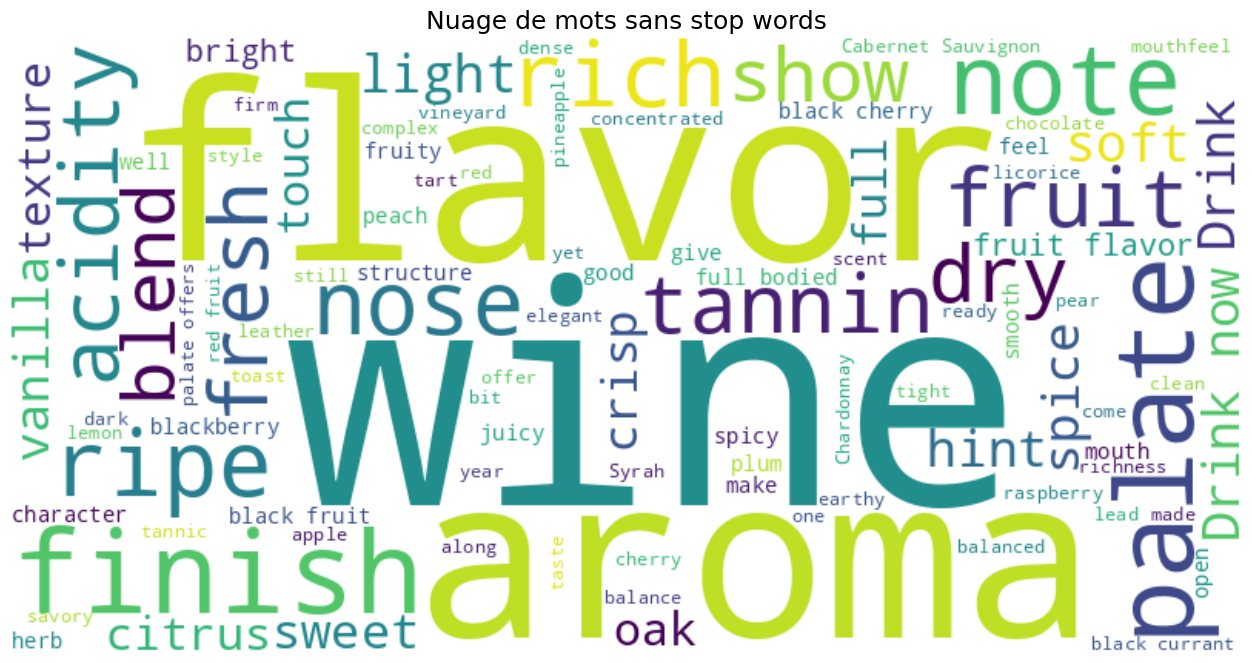

In [30]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

#Rassembler les descriptions avec un échantillon de 10000
text = " ".join(df["description"].dropna().sample(10000, random_state=42))

# 2. Définir la liste des stop words
stopwords = set(STOPWORDS)

# 3. Créer le nuage de mots sans stop words
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    stopwords=stopwords,
    max_words=100
).generate(text)

#Ensuite afficher
plt.figure(figsize=(16, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Nuage de mots sans stop words", fontsize=18)
plt.show()

Machine Learning

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


In [32]:
print("df_classic:", df_classic.shape)
print("df_encoded:", df_encoded.shape)

df_classic: (6106, 7)
df_encoded: (6106, 1447)


In [34]:
sample_index = df_encoded.index

In [35]:
X = df_encoded.loc[sample_index].drop(columns=["price"])  # si "price" est là, sinon pas besoin du .drop
y = df.loc[sample_index, "price"]

In [36]:
#cela supprime les lignes où y (la target "price") est manquant
mask = y.notna()
X = X[mask]
y = y[mask]

In [37]:
# combien de NaN ?
print(y.isna().sum())

0


In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [40]:
#Prédictions
y_pred = model.predict(X_test)


In [44]:
#Evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

In [45]:
print("Avec Linéairerégression")
print("Prix moyen prédit :", y_pred.mean())
print("Prix max prédit :", y_pred.max())
print("Prix min prédit :", y_pred.min())

Avec Linéairerégression
Prix moyen prédit : 54.57485400031736
Prix max prédit : 833.8791904959517
Prix min prédit : -21.588353906676275


In [46]:
#Je teste sur un modèle plus robuste avec Randomforest

In [47]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Évaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print("RMSE :", rmse)
print("R² :", r2)

RMSE : 19.579482458735725
R² : 0.5736393412814846


In [48]:
print("RandomForestRegressor")
print("Prix moyen prédit :", y_pred.mean())
print("Prix max prédit :", y_pred.max())
print("Prix min prédit :", y_pred.min())

RandomForestRegressor
Prix moyen prédit : 52.888213371895034
Prix max prédit : 781.551
Prix min prédit : 25.12


In [ ]:
#Pas de trop de différences de prix avec les 2 mdèles sur le prix moyen de la bouteille de vin.
#Concernant, les extrêmes, (prix min vs prix max, => sacré écart !)

Machine Learning avec  NLP

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialise le vectoriseur
vectorizer = TfidfVectorizer(max_features=100, stop_words='english')

# Applique le vectoriseur sur la colonne description
X_nlp = vectorizer.fit_transform(df['description'].fillna(""))

# Convertit en DataFrame
import pandas as pd
df_nlp = pd.DataFrame(X_nlp.toarray(), columns=vectorizer.get_feature_names_out(), index=df.index)


In [51]:
# On suppose que df_encoded contient les variables classiques encodées (sans description)
df_full = pd.concat([df_encoded, df_nlp], axis=1)


In [52]:
df_full['price'] = df['price']
df_full = df_full.dropna(subset=['price'])


In [53]:
X = df_full.drop(columns='price')
y = df_full['price']


In [54]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=70, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R²:", r2)


RMSE: 26.913692586857273
R²: 0.16331451221692417


In [56]:
print("RandomForestRegressor avec NLP")
print("Prix moyen prédit :", y_pred.mean())
print("Prix max prédit :", y_pred.max())
print("Prix min prédit :", y_pred.min())

RandomForestRegressor
Prix moyen prédit : 35.50769886788114
Prix max prédit : 775.0142857142857
Prix min prédit : 7.444761904761906


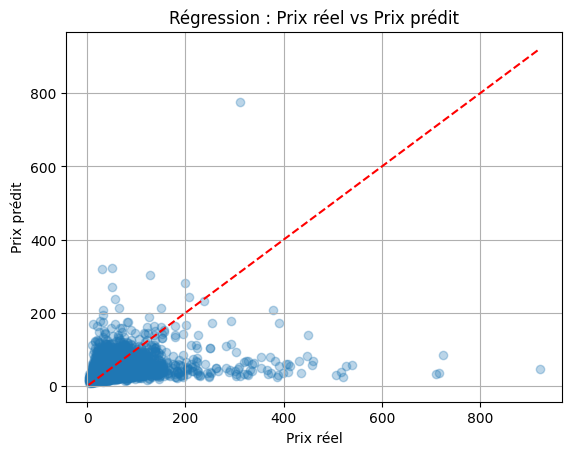

In [55]:
#je vais faire un graphique pour la bonne présentation du prix
plt.scatter(y_test, y_pred, alpha=0.3)
plt.xlabel("Prix réel")
plt.ylabel("Prix prédit")
plt.title("Régression : Prix réel vs Prix prédit")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # diagonale idéale
plt.grid(True)
plt.show()


In [ ]:
#a ligne rouge en pointillé est la diagonale idéale (où prix prédit = prix réel).
L #modèle prédit mieux les vins à moins de $150
#le modèle sous estime les prix réels
#Beaucoup de points en dessous de la diagoname => modèle sous-estime les prix réels.
#PEn conclusion il prédit mal les extrêmes, plus les vins sont cher, plus le prix est incohérent

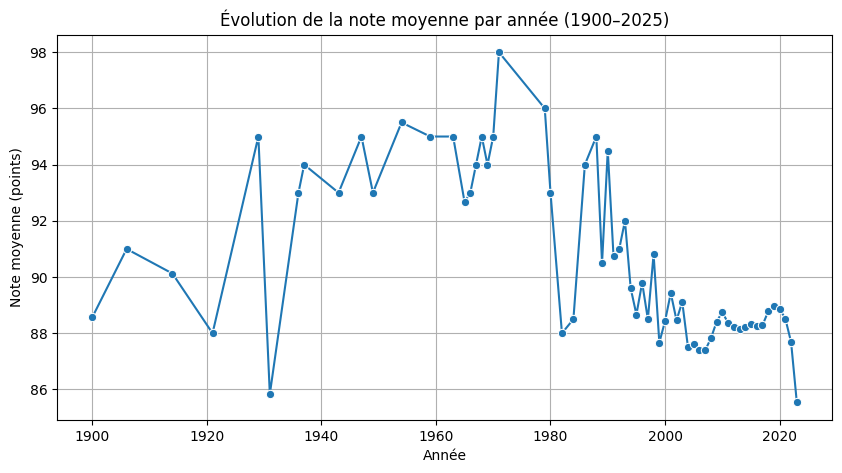

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

# Nettoyage : filtrer les années entre 1900 et 2025
df_clean = df.copy()
df_clean["annee"] = pd.to_numeric(df_clean["annee"], errors="coerce")
df_clean = df_clean[(df_clean["annee"] >= 1900) & (df_clean["annee"] <= 2025)]

# Moyenne des points par année
mean_points = df_clean.groupby("annee")["points"].mean().reset_index()

# Graphique
plt.figure(figsize=(10, 5))
sns.lineplot(data=mean_points, x="annee", y="points", marker="o")
plt.title("Évolution de la note moyenne par année (1900–2025)")
plt.xlabel("Année")
plt.ylabel("Note moyenne (points)")
plt.grid(True)
plt.show()

plt.show()

In [ ]:
#Entre 1940 et 1980 :
#=> notes élevées, souvent au-dessus de 94.

#Période où les meilleurs crus semblent dominer l’échantillon.

#Après 1980 :
#=>Tendance à la baisse des notes moyennes.
#Les notes chutent parfois sous 88 points.

#Années récentes (2000–2020) :
#La moyenne stagne entre 87 et 89 points.

#Moins de variabilité (les points sont resserrés).

#2021–2025 :
#Fortes baisses observées (note < 86).


Machine Learning sur le prix du pinot noir Bourgogne (c'est une phase d'entraînement pour trouver le bon prix, il s'agit d'un brouillon. J'ai sélectionné les variables)

In [ ]:
#je définis la target et les variables explicatives
X = df_number.drop("price", axis=1)
y = df_number["price"]

In [ ]:
#c'est pour vérifier
print(X.shape)
print(y.shape)

(1197, 67)
(1197,)


In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


In [ ]:
# Séparation des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Création du pipeline
model = make_pipeline(
    StandardScaler(),               # standardisation des données
    RandomForestRegressor(n_estimators=100, random_state=42)
)


In [ ]:
#il faut entraîner
model.fit(X_train, y_train)


,steps,"[('standardscaler', ...), ('randomforestregressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2


In [ ]:
# Prédiction
y_pred = model.predict(X_test)


In [ ]:
#On évalue le modèle

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(" RMSE :", rmse)
print(" R² :", r2)

 RMSE : 55.046359979308846
 R² : 0.8206094664518248


In [ ]:
print("Prix moyen prédit :", y_pred.mean())
print("Prix max prédit :", y_pred.max())
print("Prix min prédit :", y_pred.min())

Prix moyen prédit : 69.36531875296137
Prix max prédit : 1259.54
Prix min prédit : 16.028400432900433


Séparer les données

Code à utiliser pour le powerbi


In [ ]:
link = "https://github.com/WildCodeSchool/wilddata/raw/main/wine.zip"
df = pd.read_csv(link)

df.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2019 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,20.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2017 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,18.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2019 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,18.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2019 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2016, this...",Vintner's Reserve Wild Child Block,87,44.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2018 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [ ]:
#je veux extraire une colonne année
df["annee"] = df["title"].str.extract(r"(\d{4})")

# pour vérifier
df[["title", "annee"]].head()

,title,annee
0,Nicosia 2019 Vulkà Bianco (Etna),2019
1,Quinta dos Avidagos 2017 Avidagos Red (Douro),2017
2,Rainstorm 2019 Pinot Gris (Willamette Valley),2019
3,St. Julian 2019 Reserve Late Harvest Riesling ...,2019
4,Sweet Cheeks 2018 Vintner's Reserve Wild Child...,2018


In [ ]:
varietes_à_garder = [
    "Pinot Noir",
    "Chardonnay",
    "Cabernet Sauvignon",
    "Red Blend",
    "Bordeaux-style Red Blend"
]

df_filtre = df[df['variety'].isin(varietes_à_garder)]
df_filtre

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,annee
4,US,"Much like the regular bottling from 2016, this...",Vintner's Reserve Wild Child Block,87,44.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2018 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,2018
10,US,"Soft, supple plum envelopes an oaky structure ...",Mountain Cuvée,87,23.0,California,Napa Valley,Napa,Virginie Boone,@vboone,Kirkland Signature 2017 Mountain Cuvée Caberne...,Cabernet Sauvignon,Kirkland Signature,2017
12,US,"Slightly reduced, this wine offers a chalky, t...",NaN,87,29.0,California,Alexander Valley,Sonoma,Virginie Boone,@vboone,Louis M. Martini 2018 Cabernet Sauvignon (Alex...,Cabernet Sauvignon,Louis M. Martini,2018
14,US,Building on 150 years and six generations of w...,NaN,87,18.0,California,Central Coast,Central Coast,Matt Kettmann,@mattkettmann,Mirassou 2018 Chardonnay (Central Coast),Chardonnay,Mirassou,2018
20,US,Ripe aromas of dark berries mingle with ample ...,Vin de Maison,87,23.0,Virginia,Virginia,NaN,Alexander Peartree,NaN,Quiévremont 2018 Vin de Maison Red (Virginia),Red Blend,Quiévremont,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129942,New Zealand,"The blend is 44% Merlot, 33% Cabernet Sauvigno...",Gimblett Gravels Merlot-Cabernet Sauvignon-Malbec,90,28.0,Hawke's Bay,NaN,NaN,Joe Czerwinski,@JoeCz,Esk Valley 2017 Gimblett Gravels Merlot-Cabern...,Bordeaux-style Red Blend,Esk Valley,2017
129944,New Zealand,This blend of Cabernet Sauvignon-Merlot and Ca...,Irongate,90,39.0,Hawke's Bay,NaN,NaN,Joe Czerwinski,@JoeCz,Babich 2016 Irongate Red (Hawke's Bay),Bordeaux-style Red Blend,Babich,2016
129946,Portugal,"Fresh and fruity, this is full of red cherry f...",Vértice,90,59.0,Douro,NaN,NaN,Roger Voss,@vossroger,Caves Transmontanas 2012 Vértice Pinot Noir (D...,Pinot Noir,Caves Transmontanas,2012
129949,Israel,"A bouquet of black cherry, tart cranberry and ...",Oak Aged,90,27.0,Galilee,NaN,NaN,Mike DeSimone,@worldwineguys,Dalton 2018 Oak Aged Cabernet Sauvignon (Galilee),Cabernet Sauvignon,Dalton,2018


In [ ]:

#je supprimme les colonnes qui ne vont pas m'aider à faire mes prédilections
df_filtre = df_filtre.drop(columns=['taster_name', 'taster_twitter_handle', 'region_2'])

In [ ]:
df_filtre

,country,description,designation,points,price,province,region_1,title,variety,winery,annee
4,US,"Much like the regular bottling from 2016, this...",Vintner's Reserve Wild Child Block,87,44.0,Oregon,Willamette Valley,Sweet Cheeks 2018 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,2018
10,US,"Soft, supple plum envelopes an oaky structure ...",Mountain Cuvée,87,23.0,California,Napa Valley,Kirkland Signature 2017 Mountain Cuvée Caberne...,Cabernet Sauvignon,Kirkland Signature,2017
12,US,"Slightly reduced, this wine offers a chalky, t...",NaN,87,29.0,California,Alexander Valley,Louis M. Martini 2018 Cabernet Sauvignon (Alex...,Cabernet Sauvignon,Louis M. Martini,2018
14,US,Building on 150 years and six generations of w...,NaN,87,18.0,California,Central Coast,Mirassou 2018 Chardonnay (Central Coast),Chardonnay,Mirassou,2018
20,US,Ripe aromas of dark berries mingle with ample ...,Vin de Maison,87,23.0,Virginia,Virginia,Quiévremont 2018 Vin de Maison Red (Virginia),Red Blend,Quiévremont,2018
...,...,...,...,...,...,...,...,...,...,...,...
129942,New Zealand,"The blend is 44% Merlot, 33% Cabernet Sauvigno...",Gimblett Gravels Merlot-Cabernet Sauvignon-Malbec,90,28.0,Hawke's Bay,NaN,Esk Valley 2017 Gimblett Gravels Merlot-Cabern...,Bordeaux-style Red Blend,Esk Valley,2017
129944,New Zealand,This blend of Cabernet Sauvignon-Merlot and Ca...,Irongate,90,39.0,Hawke's Bay,NaN,Babich 2016 Irongate Red (Hawke's Bay),Bordeaux-style Red Blend,Babich,2016
129946,Portugal,"Fresh and fruity, this is full of red cherry f...",Vértice,90,59.0,Douro,NaN,Caves Transmontanas 2012 Vértice Pinot Noir (D...,Pinot Noir,Caves Transmontanas,2012
129949,Israel,"A bouquet of black cherry, tart cranberry and ...",Oak Aged,90,27.0,Galilee,NaN,Dalton 2018 Oak Aged Cabernet Sauvignon (Galilee),Cabernet Sauvignon,Dalton,2018


In [ ]:
#je supprime les doublons
df_filtre = df_filtre.drop_duplicates()

In [ ]:
#je vérifie les lignes
df_filtre.shape

(46687, 11)

In [ ]:
df_filtre.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46687 entries, 4 to 129953
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      46669 non-null  object 
 1   description  46687 non-null  object 
 2   designation  32146 non-null  object 
 3   points       46687 non-null  int64  
 4   price        43593 non-null  float64
 5   province     46669 non-null  object 
 6   region_1     42498 non-null  object 
 7   title        46687 non-null  object 
 8   variety      46687 non-null  object 
 9   winery       46687 non-null  object 
 10  annee        46041 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 4.3+ MB


In [ ]:
df_filtre

,country,description,designation,points,price,province,region_1,title,variety,winery,annee
4,US,"Much like the regular bottling from 2016, this...",Vintner's Reserve Wild Child Block,87,44.0,Oregon,Willamette Valley,Sweet Cheeks 2018 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,2018
10,US,"Soft, supple plum envelopes an oaky structure ...",Mountain Cuvée,87,23.0,California,Napa Valley,Kirkland Signature 2017 Mountain Cuvée Caberne...,Cabernet Sauvignon,Kirkland Signature,2017
12,US,"Slightly reduced, this wine offers a chalky, t...",NaN,87,29.0,California,Alexander Valley,Louis M. Martini 2018 Cabernet Sauvignon (Alex...,Cabernet Sauvignon,Louis M. Martini,2018
14,US,Building on 150 years and six generations of w...,NaN,87,18.0,California,Central Coast,Mirassou 2018 Chardonnay (Central Coast),Chardonnay,Mirassou,2018
20,US,Ripe aromas of dark berries mingle with ample ...,Vin de Maison,87,23.0,Virginia,Virginia,Quiévremont 2018 Vin de Maison Red (Virginia),Red Blend,Quiévremont,2018
...,...,...,...,...,...,...,...,...,...,...,...
129942,New Zealand,"The blend is 44% Merlot, 33% Cabernet Sauvigno...",Gimblett Gravels Merlot-Cabernet Sauvignon-Malbec,90,28.0,Hawke's Bay,NaN,Esk Valley 2017 Gimblett Gravels Merlot-Cabern...,Bordeaux-style Red Blend,Esk Valley,2017
129944,New Zealand,This blend of Cabernet Sauvignon-Merlot and Ca...,Irongate,90,39.0,Hawke's Bay,NaN,Babich 2016 Irongate Red (Hawke's Bay),Bordeaux-style Red Blend,Babich,2016
129946,Portugal,"Fresh and fruity, this is full of red cherry f...",Vértice,90,59.0,Douro,NaN,Caves Transmontanas 2012 Vértice Pinot Noir (D...,Pinot Noir,Caves Transmontanas,2012
129949,Israel,"A bouquet of black cherry, tart cranberry and ...",Oak Aged,90,27.0,Galilee,NaN,Dalton 2018 Oak Aged Cabernet Sauvignon (Galilee),Cabernet Sauvignon,Dalton,2018


In [ ]:
df_filtre.to_csv('df_vin.csv')

In [ ]:
from google.colab import files

files.download('df_vin.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>